# Graduate Rotational Internship Program : The Sparks Foundation
# Data Science & Business Analytics
# Author : Burzin N. Wadia
# Task 1 : Prediction using Supervised ML
#                Predict the percentage score of students based on the hours of study

In [2]:
#importing all the required libraries to solve this regresion problem

import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn import linear_model

In [3]:
#Reading the data from the given file

data1 = pd.read_table("students_score.txt")

In [4]:

type(data1)

pandas.core.frame.DataFrame

In [5]:
data1


,"Hours,Scores"
0,"2.5,21"
1,"5.1,47"
2,"3.2,27"
3,"8.5,75"
4,"3.5,30"
5,"1.5,20"
6,"9.2,88"
7,"5.5,60"
8,"8.3,81"
9,"2.7,25"


In [6]:
#Converting the column to a string type to further apply the split command easily

data1["Hours,Scores"]=data1["Hours,Scores"].astype(str)

In [7]:
#Splitting the Hours,Scores column to Hours abd Scores
data1[["Hours","Scores"]]=data1["Hours,Scores"].str.split(",", expand=True)

In [8]:
data1.head()

,"Hours,Scores",Hours,Scores
0,"2.5,21",2.5,21
1,"5.1,47",5.1,47
2,"3.2,27",3.2,27
3,"8.5,75",8.5,75
4,"3.5,30",3.5,30


In [9]:
#Droppinvg the extra Hours,Scores column using .drop command
data1.drop(columns=["Hours,Scores"], inplace=True)

In [10]:
data1.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [11]:
#The data type of the columns is str or object type to which math operations wont be eligible
data1.dtypes

Hours     object
Scores    object
dtype: object

In [12]:
#Converting object type to numeric type
data1[['Hours', 'Scores']] = data1[['Hours', 'Scores']].apply(pd.to_numeric)

In [13]:
#Converting the object type to int and float to carry on math operation 
data1.dtypes

Hours     float64
Scores      int64
dtype: object

In [14]:
data1.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [27]:
# To check if there are any null values in the data frame data1
data1.isnull().sum()

Hours     0
Scores    0
dtype: int64

c:\users\burzin\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Hours', ylabel='Density'>

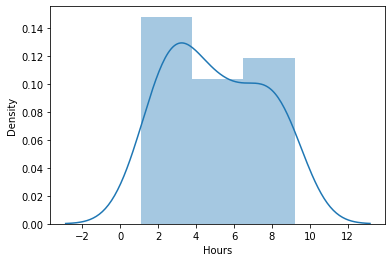

In [16]:
sns.distplot(data1.Hours)

c:\users\burzin\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Scores', ylabel='Density'>

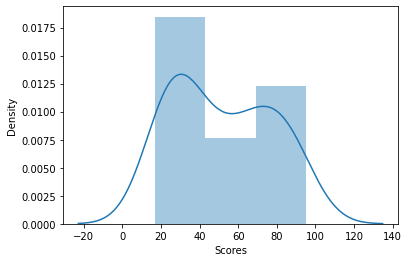

In [17]:
sns.distplot(data1.Scores)

In [30]:
# Finding the correlation between the two variables : Hours and Scores
data1.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


### There is a positive correlation and a linear relationship betwwen Hours and Scores, as Hours increase scores increase

In [18]:
X =data1.iloc[:, :-1].values  
y =data1.iloc[:, 1].values  

In [19]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

In [20]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training complete.")

Training complete.


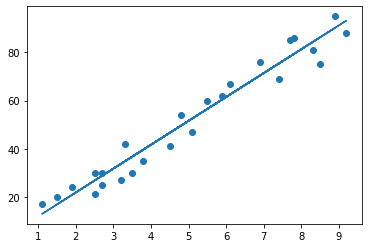

In [21]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

In [22]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [23]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


## Let's find out the score for students who studies for 9.25 hours

In [24]:
# You can also test with your own data
hours = 9.25
own_pred = regressor.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737535


In [25]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002975
